In [1]:
import jieba
import jieba.analyse #
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 分词

In [13]:
text = """
Python是一种高级、解释型和通用的编程语言。它的设计具有强调代码可读性和编写者的程序设计的能力的特点，同时提供了大量的标准库以支持任务的多样化，从而使Python成为其他语言之一的综合语言。
在Python中，你可以轻松地执行数学计算、处理文本、创建图形用户界面、解决网络问题等等。它是一门简单而强大的语言，适用于初学者和专业开发人员。
这是一段简短的介绍，但它包含了很多关键词，比如Python、编程语言、代码可读性、标准库等等。
"""

In [14]:
# 分词
seg_list = jieba.cut(text)

# 转换成列表
word_list = list(seg_list)

# 打印分词结果
print("分词结果: ", "/ ".join(word_list))


分词结果:  
/ Python/ 是/ 一种/ 高级/ 、/ 解释型/ 和/ 通用/ 的/ 编程语言/ 。/ 它/ 的/ 设计/ 具有/ 强调/ 代码/ 可读性/ 和/ 编写者/ 的/ 程序设计/ 的/ 能力/ 的/ 特点/ ，/ 同时/ 提供/ 了/ 大量/ 的/ 标准/ 库以/ 支持/ 任务/ 的/ 多样化/ ，/ 从而/ 使/ Python/ 成为/ 其他/ 语言/ 之一/ 的/ 综合/ 语言/ 。/ 
/ 在/ Python/ 中/ ，/ 你/ 可以/ 轻松/ 地/ 执行/ 数学/ 计算/ 、/ 处理/ 文本/ 、/ 创建/ 图形用户界面/ 、/ 解决/ 网络/ 问题/ 等等/ 。/ 它/ 是/ 一门/ 简单/ 而/ 强大/ 的/ 语言/ ，/ 适用/ 于/ 初学者/ 和/ 专业/ 开发人员/ 。/ 
/ 这是/ 一段/ 简短/ 的/ 介绍/ ，/ 但/ 它/ 包含/ 了/ 很多/ 关键词/ ，/ 比如/ Python/ 、/ 编程语言/ 、/ 代码/ 可读性/ 、/ 标准/ 库/ 等等/ 。/ 



## 加载自定义词典


In [15]:
jieba.load_userdict("userdict.txt")
# 分词
seg_list = jieba.cut(text)

> -  “台中”总是被切成“台 中”？（以及类似情况）
> P(台中) ＜ P(台)×P(中)，“台中”词频不够导致其成词概率较低
> 
> 
> **解决方法：强制调高词频**
> 
> ```jieba.add_word('台中') ```或者 ```jieba.suggest_freq('台中', True)```
> 
> - “今天天气 不错”应该被切成“今天 天气 不错”？（以及类似情况）
> 
> **解决方法：强制调低词频**
> 
> ```jieba.suggest_freq(('今天', '天气'), True)
> ```
> 或者直接删除该词 ```jieba.del_word('今天天气')```

In [16]:
# 已经在userdict.txt上添加上“数学”和“计算”两词了，分词仍然为“数学计算”，可考虑以下操作
jieba.del_word('数学计算')

In [17]:
# 转换成列表
word_list = list(seg_list)

# 打印分词结果
print("分词结果: ", "/ ".join(word_list))


分词结果:  
/ Python/ 是/ 一种/ 高级/ 、/ 解释型/ 和/ 通用/ 的/ 编程语言/ 。/ 它/ 的/ 设计/ 具有/ 强调/ 代码/ 可读性/ 和/ 编写者/ 的/ 程序设计/ 的/ 能力/ 的/ 特点/ ，/ 同时/ 提供/ 了/ 大量/ 的/ 标准/ 库以/ 支持/ 任务/ 的/ 多样化/ ，/ 从而/ 使/ Python/ 成为/ 其他/ 语言/ 之一/ 的/ 综合/ 语言/ 。/ 
/ 在/ Python/ 中/ ，/ 你/ 可以/ 轻松/ 地/ 执行/ 数学/ 计算/ 、/ 处理/ 文本/ 、/ 创建/ 图形用户界面/ 、/ 解决/ 网络/ 问题/ 等等/ 。/ 它/ 是/ 一门/ 简单/ 而/ 强大/ 的/ 语言/ ，/ 适用/ 于/ 初学者/ 和/ 专业/ 开发人员/ 。/ 
/ 这是/ 一段/ 简短/ 的/ 介绍/ ，/ 但/ 它/ 包含/ 了/ 很多/ 关键词/ ，/ 比如/ Python/ 、/ 编程语言/ 、/ 代码/ 可读性/ 、/ 标准/ 库/ 等等/ 。/ 



## 停用词 + 关键词提取

In [18]:
# 加载停用词表
jieba.analyse.set_stop_words("stopwords.txt")

# 使用 jieba.analyse.extract_tags 提取关键词
keywords = jieba.analyse.extract_tags(text, topK=10) #10个关键词

# 打印关键词
print("关键词: ", "/ ".join(keywords))


关键词:  Python/ 编程语言/ 可读性/ 语言/ 代码/ 编写者/ 图形用户界面/ 开发人员/ 解释型/ 库以


# wordcloud与词云

In [22]:
# 构建关键词字符串
keywords_str = " ".join(keywords)

In [23]:
keywords_str

'Python 标准库 编程语言 可读性 语言 代码 编写者 图形用户界面 开发人员 解释型'

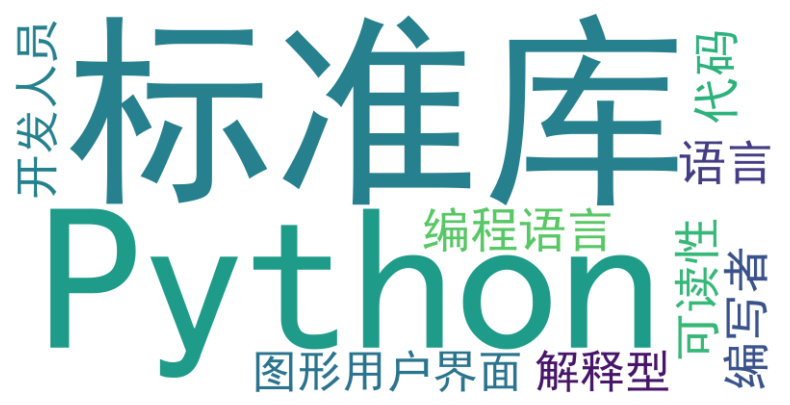

In [24]:
# 创建词云
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=100, 
    collocations=False, 
    font_path='simhei.ttf',  # 使用支持中文的字体
).generate(keywords_str)

# 显示词云图像
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') #告诉 Matplotlib 使用双线性插值方法显示词云图像，以获得更加平滑的视觉效果。
plt.axis('off')
plt.show()

# 词性标注

In [27]:
import jieba
import jieba.posseg as pseg

# 示例文本
text = "张三在上海工作，他是自然语言处理领域的专家。"

# 对文本进行分词和词性标注
words = pseg.cut(text)

# 输出分词和词性
for word, pos in words:
    print(f"{word}\t{pos}")


张三	nr
在	p
上海	ns
工作	vn
，	x
他	r
是	v
自然语言	l
处理	v
领域	n
的	uj
专家	n
。	x


# snowNLP与情感分析

In [19]:
from snownlp import SnowNLP

In [22]:
text1 = '书质量很好，好评'
s1 = SnowNLP(text1)
print(text1, s1.sentiments)

书质量很好，好评 0.7746653991091202


In [23]:
text2 = '我今天不开心'
s2 = SnowNLP(text2)
print(text2, s2.sentiments)

我今天不开心 0.6037259783171506


# 百度AI与情感分析

In [24]:
##调用相关包
from aip import AipNlp

In [25]:
##常量APP_ID在百度云控制台中创建，常量API_KEY与SECRET_KEY是在创建完毕应用后，系统分配给用户的，均为字符串，用于标识用户，为访问做签名验证，可在AI服务控制台中的应用列表中查看。
##获取说明见链接：https://ai.baidu.com/ai-doc/REFERENCE/Ck3dwjgn3
APP_ID = '229**'##替换成自己的id
API_KEY = 'sc**'##替换成自己的key
SECRET_KEY = 'Gs**'##替换成自己的key
client = AipNlp(APP_ID, API_KEY, SECRET_KEY)

In [26]:
##评论观点抽取接口用来提取一条评论句子的关注点和评论观点，并输出评论观点标签及评论观点极性。
##prop为属性词
##adj为匹配上的描述词
##sentiment 该情感搭配的极性（0表示消极，1表示中性，2表示积极）
text = "华为手机拍照很给力"

""" 调用评论观点抽取 """
client.commentTag(text);

""" 如果有可选参数 """
options = {}
options["type"] = 13

""" 带参数调用评论观点抽取 """
client.commentTag(text, options)

{'log_id': 8658779228808377992,
 'items': [{'sentiment': 2,
   'abstract': '华为手机<span>拍照很给力</span>',
   'prop': '拍照',
   'begin_pos': 8,
   'end_pos': 18,
   'adj': '给力'}]}

In [29]:
text = "书质量很好，好评"

""" 调用情感倾向分析 """
client.sentimentClassify(text)

{'text': '书质量很好，好评',
 'items': [{'confidence': 0.999977,
   'negative_prob': 1.0274e-05,
   'positive_prob': 0.99999,
   'sentiment': 2}],
 'log_id': 1732989940811549238}

In [30]:
text = "我今天不开心"

""" 调用情感倾向分析 """
client.sentimentClassify(text)

{'text': '我今天不开心',
 'items': [{'confidence': 0.832025,
   'negative_prob': 0.924411,
   'positive_prob': 0.0755887,
   'sentiment': 0}],
 'log_id': 1732990058326337967}